In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [185]:
# params
dt = 0.01
r = 10.0
g = 9.81
H = np.eye(2)      # observation matrix
P = np.eye(2)*0.01 # filter covariance
Q = np.eye(2)*0.01 # covariance of process noise
R = np.eye(2)*0.001 # covariance of measurement noise

In [175]:
def compute_k(H,P,R):
    k = H @ P @ np.linalg.inv(H @ P @ H.T + R)
    return k
    
def build_A():
    A = np.array([(1, dt), (-g*dt/r, .999)])
    
    return A

def generate_noise(covariance):
    sample = np.zeros((covariance.shape[0],1))
    
    for r in range(covariance.shape[0]):
        sample[r,0] = np.random.normal(0, np.sqrt(covariance[r,r]))
    
    return sample
            

def predict(x,A,u,B,P):
    x_new = A*x + B*u
    return x_new, P_new

def update(x,z,H,P):
    x_new
    P_new
    return x_new, P_new

In [176]:
generate_noise(P).shape

(2, 1)

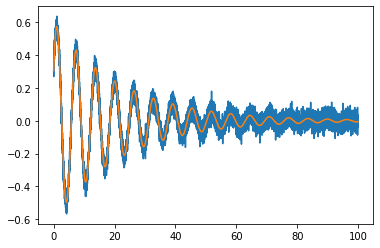

In [186]:
n = 10000
x_init = np.array([0.3,0.5])
x = x_init
A = build_A()
x_history = np.zeros((2,n))
t_history = np.zeros((1,n))
z_true = np.zeros((2,n))
z = np.zeros((2,n))


for i in range(n):
    x = A @ x
    x_history[0:2,i] = x
    t_history[0,i] = dt*i
    
    z_true[0:2,i] = H @ x
    z[0:2,i] = z_true[0:2,i] + generate_noise(R).reshape(2,)


plt.plot(t_history[0,:], z[0,:])
plt.plot(t_history[0,:], x_history[0,:])
plt.show()

